## Artificial Neural Network

Artificial neural networks (ANN) can extract meaning from features that we would not have discovered ourselves. A lot of times, a simpler regression technique such as linear regression performs better. However, as we have temporal data which is not well modelled by a linear regression, we will build an ANN to try to model forest fire damage. First we import the data.

In [10]:
### importing libraries ###

import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
### importing data ###

# features
features_train = pd.read_csv('data/features_train.csv', index_col = 0)
features_test = pd.read_csv('data/features_test.csv', index_col = 0)

# target
target_train = pd.read_csv('data/target_train.csv', index_col = 0)
target_test = pd.read_csv('data/target_test.csv', index_col = 0)

Now we will build our ANN.

In [3]:
### building ANN ###

def ann():
    classifier = Sequential()
    
    classifier.add(Dense(6, activation = 'relu', input_dim = 12))
    classifier.add(Dense(6, activation = 'relu'))
    classifier.add(Dense(6, activation = 'relu'))
    
    classifier.add(Dropout(0.2))
    
    classifier.add(Dense(1, activation = 'relu'))
    
    classifier.compile(optimizer = 'adam', loss = 'mse')
    
    return classifier

In [4]:
### ANN model ###

# fitting model
model = ann()
history = model.fit(features_train, target_train, validation_data = (features_test, target_test), 
                    batch_size = 10, epochs = 100)

Train on 258 samples, validate on 259 samples
Epoch 1/100
258/258 [==============================] - 1s 4ms/step - loss: 1.1340 - val_loss: 1.0296
Epoch 2/100
258/258 [==============================] - 0s 1ms/step - loss: 1.0769 - val_loss: 1.0225
Epoch 3/100
258/258 [==============================] - 0s 1ms/step - loss: 1.0515 - val_loss: 1.0207
Epoch 4/100
258/258 [==============================] - 0s 957us/step - loss: 1.0157 - val_loss: 1.0187
Epoch 5/100
258/258 [==============================] - 0s 972us/step - loss: 1.0126 - val_loss: 1.0167
Epoch 6/100
258/258 [==============================] - 0s 1ms/step - loss: 1.0145 - val_loss: 1.0150
Epoch 7/100
258/258 [==============================] - 0s 1ms/step - loss: 1.0003 - val_loss: 1.0143
Epoch 8/100
258/258 [==============================] - 0s 1ms/step - loss: 1.0084 - val_loss: 1.0144
Epoch 9/100
258/258 [==============================] - 0s 1ms/step - loss: 1.0047 - val_loss: 1.0144
Epoch 10/100
258/258 [===================

258/258 [==============================] - 0s 987us/step - loss: 0.9877 - val_loss: 1.0450
Epoch 81/100
258/258 [==============================] - 0s 1ms/step - loss: 0.9821 - val_loss: 1.0487
Epoch 82/100
258/258 [==============================] - 0s 1ms/step - loss: 0.9768 - val_loss: 1.0522
Epoch 83/100
258/258 [==============================] - 0s 1ms/step - loss: 0.9762 - val_loss: 1.0537
Epoch 84/100
258/258 [==============================] - 0s 1ms/step - loss: 0.9847 - val_loss: 1.0536
Epoch 85/100
258/258 [==============================] - 0s 1ms/step - loss: 0.9782 - val_loss: 1.0608
Epoch 86/100
258/258 [==============================] - 0s 1ms/step - loss: 0.9923 - val_loss: 1.0563
Epoch 87/100
258/258 [==============================] - 0s 1ms/step - loss: 0.9835 - val_loss: 1.0530
Epoch 88/100
258/258 [==============================] - 0s 982us/step - loss: 0.9819 - val_loss: 1.0571
Epoch 89/100
258/258 [==============================] - 0s 1ms/step - loss: 0.9743 - val_lo

Now we will plot our model loss.

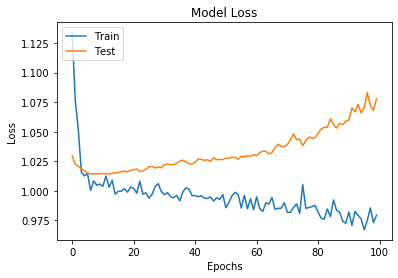

In [5]:
### plotting loss ###

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')

It seems that about 10 epochs is when the ANN starts to overtrain. We will now retrain the model to use only 10 epochs.

In [6]:
### ANN model ###

# fitting model
model = ann()
model.fit(features_train, target_train, validation_data = (features_test, target_test), 
                    batch_size = 10, epochs = 10)

Train on 258 samples, validate on 259 samples
Epoch 1/10
258/258 [==============================] - 1s 2ms/step - loss: 1.0073 - val_loss: 0.9886
Epoch 2/10
258/258 [==============================] - 0s 916us/step - loss: 0.9980 - val_loss: 0.9896
Epoch 3/10
258/258 [==============================] - 0s 1ms/step - loss: 0.9874 - val_loss: 0.9897
Epoch 4/10
258/258 [==============================] - 0s 1ms/step - loss: 0.9915 - val_loss: 0.9896
Epoch 5/10
258/258 [==============================] - 0s 1ms/step - loss: 0.9948 - val_loss: 0.9894
Epoch 6/10
258/258 [==============================] - 0s 1ms/step - loss: 0.9878 - val_loss: 0.9880
Epoch 7/10
258/258 [==============================] - 0s 1ms/step - loss: 0.9966 - val_loss: 0.9884
Epoch 8/10
258/258 [==============================] - 0s 2ms/step - loss: 0.9827 - val_loss: 0.9879
Epoch 9/10
258/258 [==============================] - 0s 2ms/step - loss: 0.9882 - val_loss: 0.9880
Epoch 10/10
258/258 [==============================]

In [11]:
### rmse ###

# prediction
pred = model.predict(features_test)

print('RMSE is:', 0.9877 ** 0.5, 'and the r2 is:', r2_score(target_test, pred))

RMSE is: 0.9938309715439543 and the r2 is: 0.012276528125084396


We were able to improve our RMSE. However, the values are still not great.

## Conclusion
ANNs are not a great way to model forest fire damage.
* r2 = 0.0122
* RMSE = 0.9938